#### Position of Spin Pucks

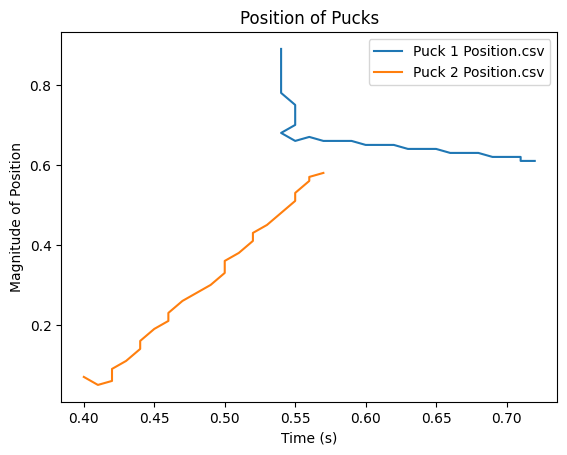

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = [float(i) for i in Time]
    Position1 = [float(i) for i in Position1]
    Position2 = [float(i) for i in Position2]

    Time_Physical = [t - Time[0] for t in Time]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    plt.plot(Position1, Position2, '-', label=f"{file_name}")

    

csv_files = ['Puck 1 Position.csv', 'Puck 2 Position.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    

plt.xlabel('Time (s)')
plt.ylabel('Magnitude of Position')
plt.title('Position of Pucks')
plt.legend()
plt.show()



#### Magnitude of Position

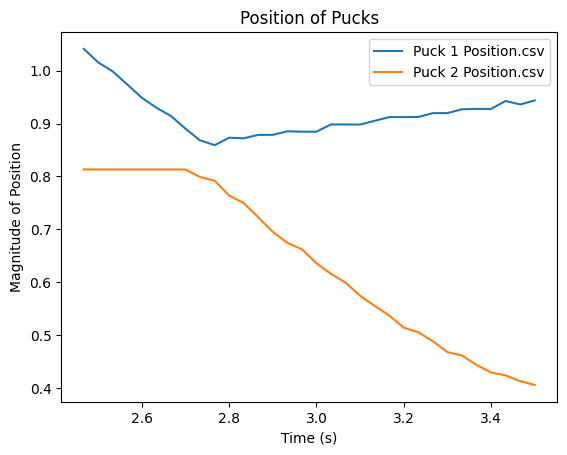

In [54]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = [float(i) for i in Time]
    Position1 = [float(i) for i in Position1]
    Position2 = [float(i) for i in Position2]

    Time_Physical = [t - Time[0] for t in Time]

    
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    plt.plot(Time, Position_Magnitude, '-', label=f"{file_name}")

    

csv_files = ['Puck 1 Position.csv', 'Puck 2 Position.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    

plt.xlabel('Time (s)')
plt.ylabel('Magnitude of Position')
plt.title('Position of Pucks')
plt.legend()
plt.show()



#### Smoothing Position

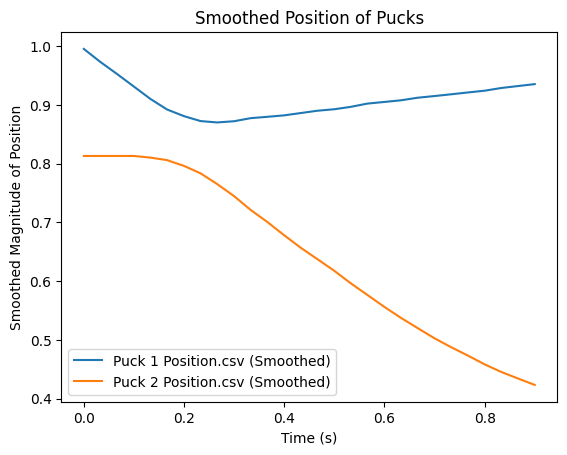

In [61]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")

csv_files = ['Puck 1 Position.csv', 'Puck 2 Position.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks')
plt.legend()
plt.show()


#### Finding max and min points points

Min point of Puck1: Time = 0.266, Position = 0.8702746949413098
Max point of Puck2: Time = 0.0, Position = 0.9954540937669624
Min point of Puck1: Time = 0.8999999999999999, Position = 0.4233523719359738
Max point of Puck2: Time = 0.06599999999999984, Position = 0.8132035415564791


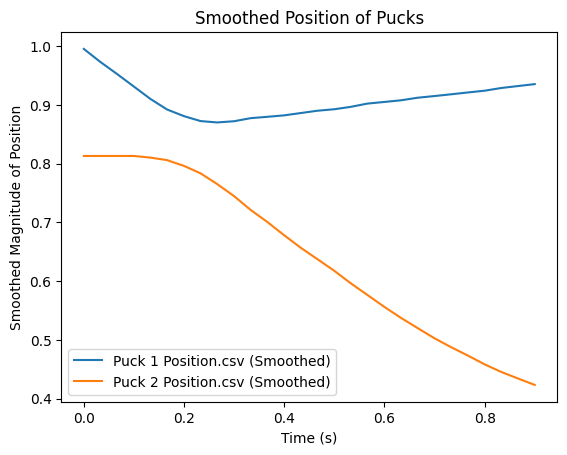

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")

    # Find min point of Puck1
    min_point_Puck1 = np.min(smoothed_position)
    min_point_Puck1_time = Time_Physical[np.argmin(smoothed_position)]

    # Find max point of Puck2
    max_point_Puck2 = np.max(smoothed_position)
    max_point_Puck2_time = Time_Physical[np.argmax(smoothed_position)]

    # Print the results
    print(f"Min point of Puck1: Time = {min_point_Puck1_time}, Position = {min_point_Puck1}")
    print(f"Max point of Puck2: Time = {max_point_Puck2_time}, Position = {max_point_Puck2}")

csv_files = ['Puck 1 Position.csv', 'Puck 2 Position.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks')
plt.legend()
plt.show()


#### From this information the Collision of the Pucks occurs at $t=0.2666$

#### Position of Velcro Pucks

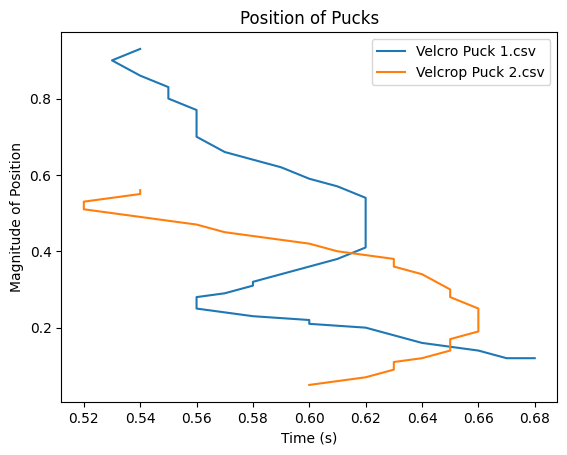

In [7]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = [float(i) for i in Time]
    Position1 = [float(i) for i in Position1]
    Position2 = [float(i) for i in Position2]

    Time_Physical = [t - Time[0] for t in Time]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    plt.plot(Position1, Position2, '-', label=f"{file_name}")

    

csv_files = ['Velcro Puck 1.csv', 'Velcrop Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    

plt.xlabel('Time (s)')
plt.ylabel('Magnitude of Position')
plt.title('Position of Pucks')
plt.legend()
plt.show()



#### Magnitude of Position (Smoothed)

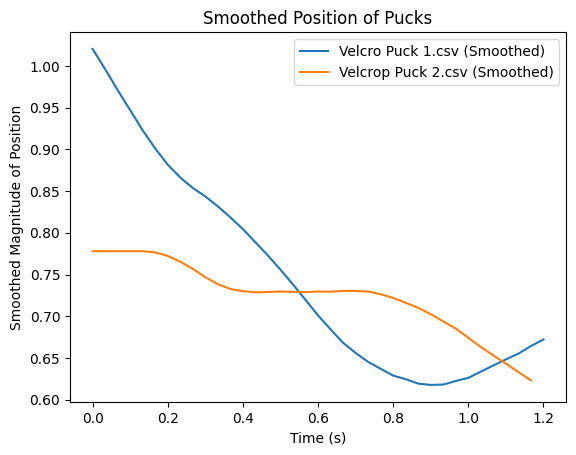

In [9]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")

csv_files = ['Velcro Puck 1.csv', 'Velcrop Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks')
plt.legend()
plt.show()


#### Point of Collision

Inflection Points for Velcro Puck 1.csv:
Time = 0.0, Position = 1.020372754496323
Time = 0.26700000000000035, Position = 0.8535987205939597
Time = 0.5340000000000003, Position = 0.7376454173021706
Time = 1.0340000000000003, Position = 0.6337230515580664
Time = 1.0670000000000002, Position = 0.6410718607965862
Time = 1.1340000000000003, Position = 0.6553480807759996
Inflection Points for Velcrop Puck 2.csv:
Time = 0.03400000000000025, Position = 0.777946013551069
Time = 0.06700000000000017, Position = 0.777946013551069
Time = 0.26700000000000035, Position = 0.7566497963283488
Time = 0.4670000000000001, Position = 0.7290676793187625
Time = 0.5, Position = 0.7296158312531954
Time = 0.6340000000000003, Position = 0.7294348700275055
Time = 1.0, Position = 0.6740854384227092
Time = 1.0670000000000002, Position = 0.6527698189618925
Time = 1.1, Position = 0.6431850226224178


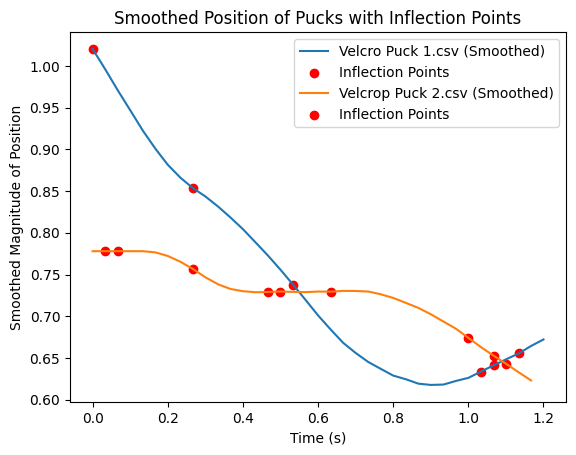

In [12]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def find_inflection_points(data):
    second_derivative = np.gradient(np.gradient(data))
    inflection_indices = np.where(np.diff(np.sign(second_derivative)))[0]
    return inflection_indices

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    # Find inflection points
    inflection_indices = find_inflection_points(smoothed_position)
    inflection_points = smoothed_position[inflection_indices]
    inflection_times = Time_Physical[inflection_indices]

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")
    plt.scatter(inflection_times, inflection_points, color='red', label='Inflection Points')

    # Print the inflection points
    print(f"Inflection Points for {file_name}:")
    for time, position in zip(inflection_times, inflection_points):
        print(f"Time = {time}, Position = {position}")

csv_files = ['Velcro Puck 1.csv', 'Velcrop Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks with Inflection Points')
plt.legend()
plt.show()


#### From this information the Collision of the Pucks occurs at $t=0.267$

#### Position of Linear Pucks

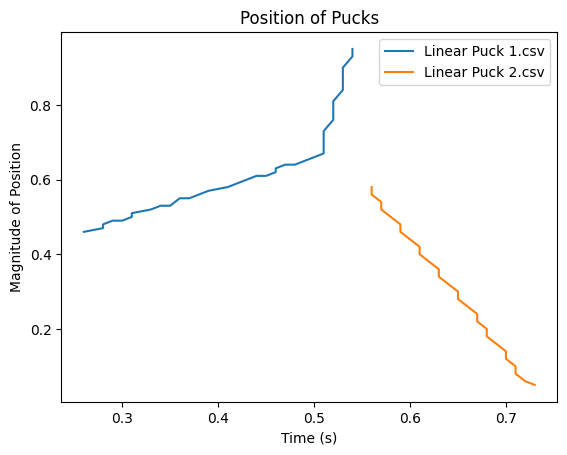

In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = [float(i) for i in Time]
    Position1 = [float(i) for i in Position1]
    Position2 = [float(i) for i in Position2]

    Time_Physical = [t - Time[0] for t in Time]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    plt.plot(Position1, Position2, '-', label=f"{file_name}")

    

csv_files = ['Linear Puck 1.csv', 'Linear Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    

plt.xlabel('Time (s)')
plt.ylabel('Magnitude of Position')
plt.title('Position of Pucks')
plt.legend()
plt.show()



#### Magnitude of Smoothed Puck Position

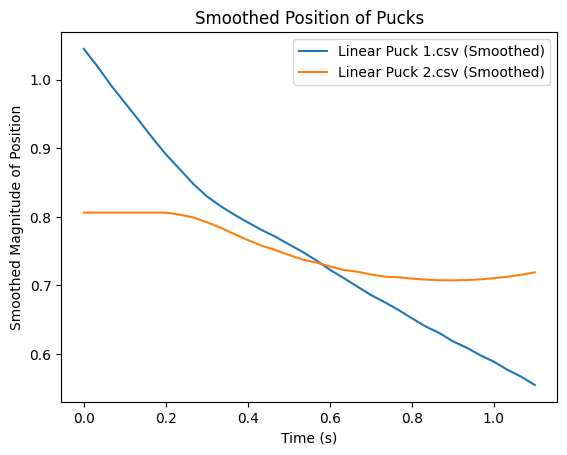

In [14]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")

csv_files = ['Linear Puck 1.csv', 'Linear Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks')
plt.legend()
plt.show()


#### Point of Collision

Inflection Points for Linear Puck 1.csv:
Time = 0.03399999999999981, Position = 1.0188737880380772
Time = 0.4339999999999997, Position = 0.7808277020258221
Time = 0.5669999999999997, Position = 0.7365665664340902
Time = 0.6999999999999997, Position = 0.6862429751328719
Time = 0.7669999999999999, Position = 0.6645524585795386
Time = 0.9339999999999997, Position = 0.6093113525057312
Inflection Points for Linear Puck 2.csv:
Time = 0.0, Position = 0.8062257748298551
Time = 0.06699999999999973, Position = 0.8062257748298551
Time = 0.1339999999999999, Position = 0.8062257748298549
Time = 0.33399999999999963, Position = 0.784136993171682


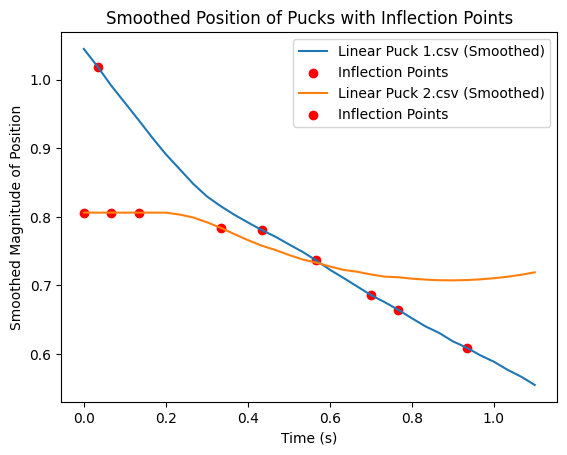

In [15]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def find_inflection_points(data):
    second_derivative = np.gradient(np.gradient(data))
    inflection_indices = np.where(np.diff(np.sign(second_derivative)))[0]
    return inflection_indices

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    # Find inflection points
    inflection_indices = find_inflection_points(smoothed_position)
    inflection_points = smoothed_position[inflection_indices]
    inflection_times = Time_Physical[inflection_indices]

    plt.plot(Time_Physical[:len(smoothed_position)], smoothed_position, '-', label=f"{file_name} (Smoothed)")
    plt.scatter(inflection_times, inflection_points, color='red', label='Inflection Points')

    # Print the inflection points
    print(f"Inflection Points for {file_name}:")
    for time, position in zip(inflection_times, inflection_points):
        print(f"Time = {time}, Position = {position}")

csv_files = ['Linear Puck 1.csv', 'Linear Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_columns_indices)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Position')
plt.title('Smoothed Position of Pucks with Inflection Points')
plt.legend()
plt.show()


#### Collision occurs at $t = 0.3339$

### The initial and final velocities

Inflection Points for Puck 1 Position.csv:
Time = 0.06599999999999984, Velocity = -0.6260893497860689
Time = 0.16599999999999993, Velocity = -0.44011685343218154
Time = 0.33299999999999974, Velocity = 0.11369302234993128
Time = 0.3999999999999999, Velocity = 0.09669086696094453
Time = 0.43299999999999983, Velocity = 0.11903528092268445
Time = 0.5, Velocity = 0.10011009283095973
Time = 0.5659999999999998, Velocity = 0.12522689317325053
Time = 0.6000000000000001, Velocity = 0.08380993794511937
Time = 0.6659999999999999, Velocity = 0.10872836821401677
Time = 0.766, Velocity = 0.09156255552009718
Time = 0.8329999999999997, Velocity = 0.119123099944904
Inflection Points for Puck 2 Position.csv:
Time = 0.0, Velocity = 0.0
Time = 0.19999999999999973, Velocity = -0.3372971304424208
Time = 0.3999999999999999, Velocity = -0.6576451117997415
Time = 0.46599999999999975, Velocity = -0.5861798590550116
Time = 0.6659999999999999, Velocity = -0.5182705276061919
Time = 0.7330000000000001, Velocity = -0

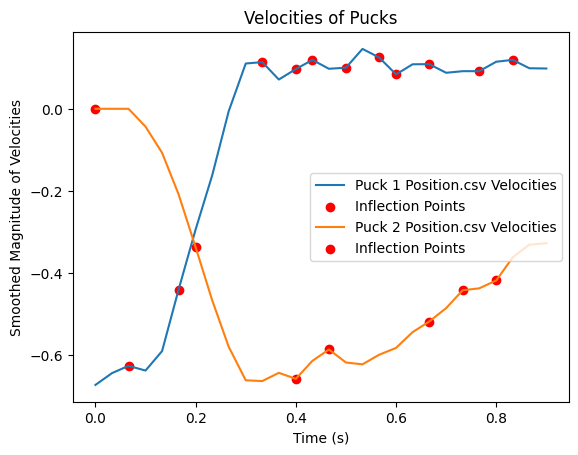

In [57]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def find_inflection_points(data):
    second_derivative = np.gradient(np.gradient(data))
    inflection_indices = np.where(np.diff(np.sign(second_derivative)))[0]
    return inflection_indices

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    # Adjust length of Time_Physical to match smoothed_position
    Time_Physical = Time_Physical[:len(smoothed_position)]

    # Calculate velocities (derivative of smoothed position)
    velocities = np.gradient(smoothed_position, Time_Physical)

    inflection_indices = find_inflection_points(velocities)
    inflection_points = velocities[inflection_indices]
    inflection_times = Time_Physical[inflection_indices]

    #plt.plot(Time_Physical, smoothed_position, '-', label=f"{file_name} (Smoothed)")
    plt.plot(Time_Physical, velocities, '-', label=f"{file_name} Velocities")
    plt.scatter(inflection_times, inflection_points, color='red', label='Inflection Points')

    # Print the inflection points
    print(f"Inflection Points for {file_name}:")
    for time, position in zip(inflection_times, inflection_points):
        print(f"Time = {time}, Velocity = {position}")

    

    

csv_files = ['Puck 1 Position.csv', 'Puck 2 Position.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

all_velocities = []
for csv_file in csv_files:
    velocities = process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    all_velocities.append(velocities)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Velocities')
plt.title('Velocities of Pucks')
plt.legend()
plt.show()


#### The initial velocity of Puck 1 is $-0.626 m/s$ and the final velocity of Puck 1 is $0.119 m/s$

#### The initial velocity of Puck 2 is $0m/s$ and the final velocity of Puck 2 is $-0.418$

#### Velcro velocities

Inflection Points for Velcro Puck 1.csv:
Time = 0.20000000000000018, Velocity = -0.5236237043310741
Time = 0.3340000000000001, Velocity = -0.37824231225709504
Time = 0.43400000000000016, Velocity = -0.475408245265486
Time = 0.4670000000000001, Velocity = -0.49399085873233517
Time = 0.6670000000000003, Velocity = -0.42221641002761245
Time = 0.734, Velocity = -0.2841955954078781
Time = 0.7670000000000003, Velocity = -0.24533916682833556
Time = 0.8000000000000003, Velocity = -0.18781840651621806
Time = 0.9000000000000004, Velocity = -0.016963445405798083
Time = 1.0670000000000002, Velocity = 0.2197025657550462
Time = 1.1, Velocity = 0.2131848522676627
Inflection Points for Velcrop Puck 2.csv:
Time = 0.03400000000000025, Velocity = -3.552713678800501e-15
Time = 0.16700000000000026, Velocity = -0.08629061417980033
Time = 0.3340000000000001, Velocity = -0.2090564975779774
Time = 0.5, Velocity = 0.001459185317076006
Time = 0.5670000000000002, Velocity = 0.006209357398001103
Time = 0.734, Velo

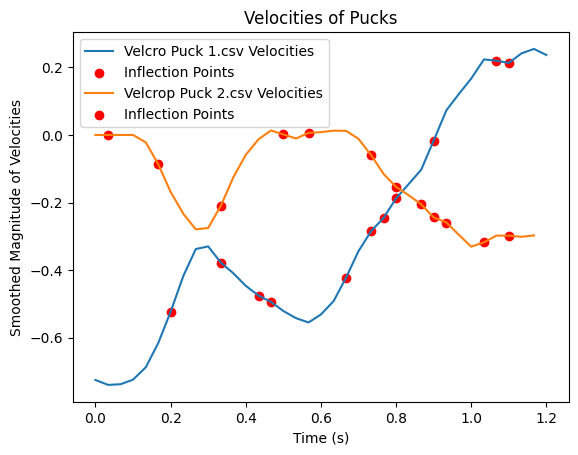

In [58]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def find_inflection_points(data):
    second_derivative = np.gradient(np.gradient(data))
    inflection_indices = np.where(np.diff(np.sign(second_derivative)))[0]
    return inflection_indices

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    # Adjust length of Time_Physical to match smoothed_position
    Time_Physical = Time_Physical[:len(smoothed_position)]

    # Calculate velocities (derivative of smoothed position)
    velocities = np.gradient(smoothed_position, Time_Physical)

    inflection_indices = find_inflection_points(velocities)
    inflection_points = velocities[inflection_indices]
    inflection_times = Time_Physical[inflection_indices]

    #plt.plot(Time_Physical, smoothed_position, '-', label=f"{file_name} (Smoothed)")
    plt.plot(Time_Physical, velocities, '-', label=f"{file_name} Velocities")
    plt.scatter(inflection_times, inflection_points, color='red', label='Inflection Points')

    # Print the inflection points
    print(f"Inflection Points for {file_name}:")
    for time, position in zip(inflection_times, inflection_points):
        print(f"Time = {time}, Velocity = {position}")

    

    

csv_files = ['Velcro Puck 1.csv', 'Velcrop Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

all_velocities = []
for csv_file in csv_files:
    velocities = process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    all_velocities.append(velocities)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Velocities')
plt.title('Velocities of Pucks')
plt.legend()
plt.show()


#### The initial velocity of Puck 1 is $-0.523 m/s$ and the final velocity of Puck 1 is $-0.187 m/s$

#### The initial velocity of Puck 2 is $0 m/s$ and the final velocity of Puck 2 is $-0.187 m/s$

Inflection Points for Linear Puck 1.csv:
Time = 0.06699999999999973, Velocity = -0.7925939310347694
Time = 0.09999999999999964, Velocity = -0.7515991619915905
Time = 0.2669999999999999, Velocity = -0.5980974911960182
Time = 0.5, Velocity = -0.33360546024893445
Time = 0.6669999999999998, Velocity = -0.37202313425397904
Time = 0.734, Velocity = -0.32411287512297804
Time = 0.7999999999999998, Velocity = -0.363910085796574
Time = 0.867, Velocity = -0.325810236022015
Time = 0.8999999999999999, Velocity = -0.3218200680897443
Inflection Points for Linear Puck 2.csv:
Time = 0.03399999999999981, Velocity = 1.7763568394002505e-15
Time = 0.09999999999999964, Velocity = 0.0
Time = 0.23399999999999999, Velocity = -0.10607498370277568
Time = 0.3999999999999999, Velocity = -0.25396743616008166
Time = 0.46699999999999964, Velocity = -0.20383257259570264
Time = 0.5, Velocity = -0.20847527710989588
Time = 0.5669999999999997, Velocity = -0.1535750411198915
Time = 0.5999999999999996, Velocity = -0.1592057

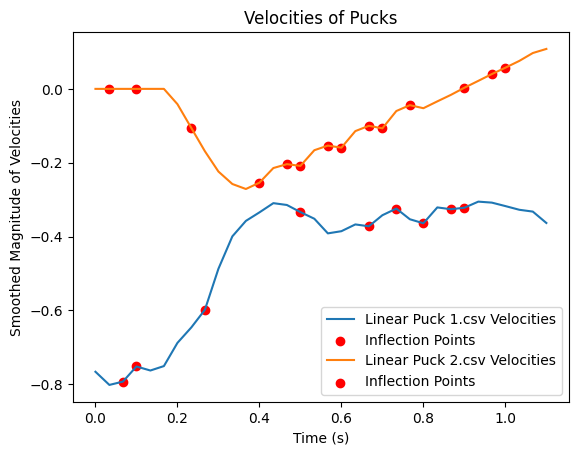

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

def find_inflection_points(data):
    second_derivative = np.gradient(np.gradient(data))
    inflection_indices = np.where(np.diff(np.sign(second_derivative)))[0]
    return inflection_indices

def process_and_plot_csv(file_name, time_column, position_columns, skip_rows=1, window_size=5):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position1 = []
        Position2 = []
        for row in reader:
            Time.append(row[time_column])
            Position1.append(row[position_columns[0]])
            Position2.append(row[position_columns[1]])

    Time = np.array([float(i) for i in Time])
    Position1 = np.array([float(i) for i in Position1])
    Position2 = np.array([float(i) for i in Position2])

    Time_Physical = Time - Time[0]

    # Compute the magnitude of the position if needed (not used here)
    Position_Magnitude = np.sqrt(np.square(Position1) + np.square(Position2))

    # Apply a moving average to smooth out the data
    smoothed_position = moving_average(Position_Magnitude, window_size)

    # Adjust length of Time_Physical to match smoothed_position
    Time_Physical = Time_Physical[:len(smoothed_position)]

    # Calculate velocities (derivative of smoothed position)
    velocities = np.gradient(smoothed_position, Time_Physical)

    inflection_indices = find_inflection_points(velocities)
    inflection_points = velocities[inflection_indices]
    inflection_times = Time_Physical[inflection_indices]

    #plt.plot(Time_Physical, smoothed_position, '-', label=f"{file_name} (Smoothed)")
    plt.plot(Time_Physical, velocities, '-', label=f"{file_name} Velocities")
    plt.scatter(inflection_times, inflection_points, color='red', label='Inflection Points')

    # Print the inflection points
    print(f"Inflection Points for {file_name}:")
    for time, position in zip(inflection_times, inflection_points):
        print(f"Time = {time}, Velocity = {position}")

    

    

csv_files = ['Linear Puck 1.csv', 'Linear Puck 2.csv']

time_column_index = 0
position_columns_indices = [1, 2]  # Use columns 2 (x) and 3 (y) for position

all_velocities = []
for csv_file in csv_files:
    velocities = process_and_plot_csv(csv_file, time_column_index, position_columns_indices)
    all_velocities.append(velocities)

plt.xlabel('Time (s)')
plt.ylabel('Smoothed Magnitude of Velocities')
plt.title('Velocities of Pucks')
plt.legend()
plt.show()


#### The initial velocity of Puck 1 is $-0.792 m/s$ and the final velocity of Puck 1 is $-0.321 m/s$

#### The initial velocity of Puck 2 is $0 m/s$ and the final velocity of Puck 2 is $0.05731 m/s$